In [1]:
pip install -q pytorch_tabular

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import random
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame

In [3]:
df=pd.read_csv('OrjinalVeriSeti.csv')
#df=pd.read_csv('VeriDengelemeUygulanmışVeriSeti.csv')
pd.set_option('display.max_columns',None)

In [4]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
df.head(300)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,16,1.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,23,3.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,33,1.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,27,4.0,16.0,1.0,0.0,0.0,0.0,1.0,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
4,18,3.0,15.0,1.0,1.0,2.0,0.003,1.0,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,22,1.0,16.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
296,22,2.0,14.0,3.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
297,18,3.0,16.0,1.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0,?,?,0,0,0,0,0,0,0,0
298,22,2.0,15.0,2.0,1.0,5.0,1.25,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,1,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [7]:
df=df.replace('?',np.nan)

In [8]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
len(df)

858

In [10]:
df.isnull().sum()/len(df)

Age                                   0.000000
Number of sexual partners             0.030303
First sexual intercourse              0.008159
Num of pregnancies                    0.065268
Smokes                                0.015152
Smokes (years)                        0.015152
Smokes (packs/year)                   0.015152
Hormonal Contraceptives               0.125874
Hormonal Contraceptives (years)       0.125874
IUD                                   0.136364
IUD (years)                           0.136364
STDs                                  0.122378
STDs (number)                         0.122378
STDs:condylomatosis                   0.122378
STDs:cervical condylomatosis          0.122378
STDs:vaginal condylomatosis           0.122378
STDs:vulvo-perineal condylomatosis    0.122378
STDs:syphilis                         0.122378
STDs:pelvic inflammatory disease      0.122378
STDs:genital herpes                   0.122378
STDs:molluscum contagiosum            0.122378
STDs:AIDS    

In [11]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [12]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1,inplace=True)

In [13]:
df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,16,1.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,23,3.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,33,1.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,27,4.0,16.0,1.0,0.0,0.0,0.0,1.0,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
4,18,3.0,15.0,1.0,1.0,2.0,0.003,1.0,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
5,20,1.0,17.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
6,17,2.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
7,21,2.0,19.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
8,27,2.0,17.0,3.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
9,36,3.0,20.0,2.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,1,1,0,0,0,0


In [14]:
df=df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [15]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [16]:
df=df.drop_duplicates()

In [17]:
df.value_counts()

Age  Number of sexual partners  First sexual intercourse  Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  IUD (years)  STDs  STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy
13   1.0                        13.0                      0.0                 0.0     0.0             0.000000             0.0                      0.00                             0.0  0.0          0.0   0.0            0.0                  0.0                           0.0                          0.0                                 0.0            0.0                               0.0                  0.0           

In [18]:
numerical_features = df.select_dtypes(include = ['int64','float64']).columns.values
numerical_features

array(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Smokes (packs/year)', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'], dtype=object)

In [19]:
from sklearn.impute import KNNImputer
num_impute = KNNImputer(n_neighbors=3)

In [20]:
num_impute.fit(df[numerical_features])

KNNImputer(n_neighbors=3)

In [21]:
df[numerical_features] = num_impute.transform(df[numerical_features])

In [22]:
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [23]:
df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,16.0,1.0,16.0,1.000000,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23.0,3.0,17.0,2.000000,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.0,1.0,16.0,4.000000,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.0,4.0,16.0,1.000000,0.0,0.0,0.000,1.0,0.670000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.0,3.0,15.0,1.000000,1.0,2.0,0.003,1.0,0.580000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,20.0,1.0,17.0,1.333333,0.0,0.0,0.000,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17.0,2.0,15.0,1.000000,0.0,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,21.0,2.0,19.0,1.000000,0.0,0.0,0.000,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,27.0,2.0,17.0,3.000000,0.0,0.0,0.000,1.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,36.0,3.0,20.0,2.000000,0.0,0.0,0.000,1.0,6.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    float64
 1   Number of sexual partners           835 non-null    float64
 2   First sexual intercourse            835 non-null    float64
 3   Num of pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes (years)                      835 non-null    float64
 6   Smokes (packs/year)                 835 non-null    float64
 7   Hormonal Contraceptives             835 non-null    float64
 8   Hormonal Contraceptives (years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD (years)                         835 non-null    float64
 11  STDs                                835 non-n

In [25]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.0,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.0,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.545309,17.037126,2.299002,0.149301,1.254688,0.470846,0.651098,2.262365,0.111377,0.513701,0.099800,0.165269,0.053493,0.0,0.004790,0.052295,0.024750,0.001198,0.001198,0.001597,0.0,0.022355,0.001198,0.002395,0.089820,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.663039,2.818250,1.433635,0.354726,4.117451,2.251040,0.457227,3.633963,0.304460,1.878311,0.294082,0.536781,0.223963,0.0,0.069088,0.221556,0.148443,0.034606,0.034606,0.036465,0.0,0.146112,0.034606,0.048912,0.306335,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


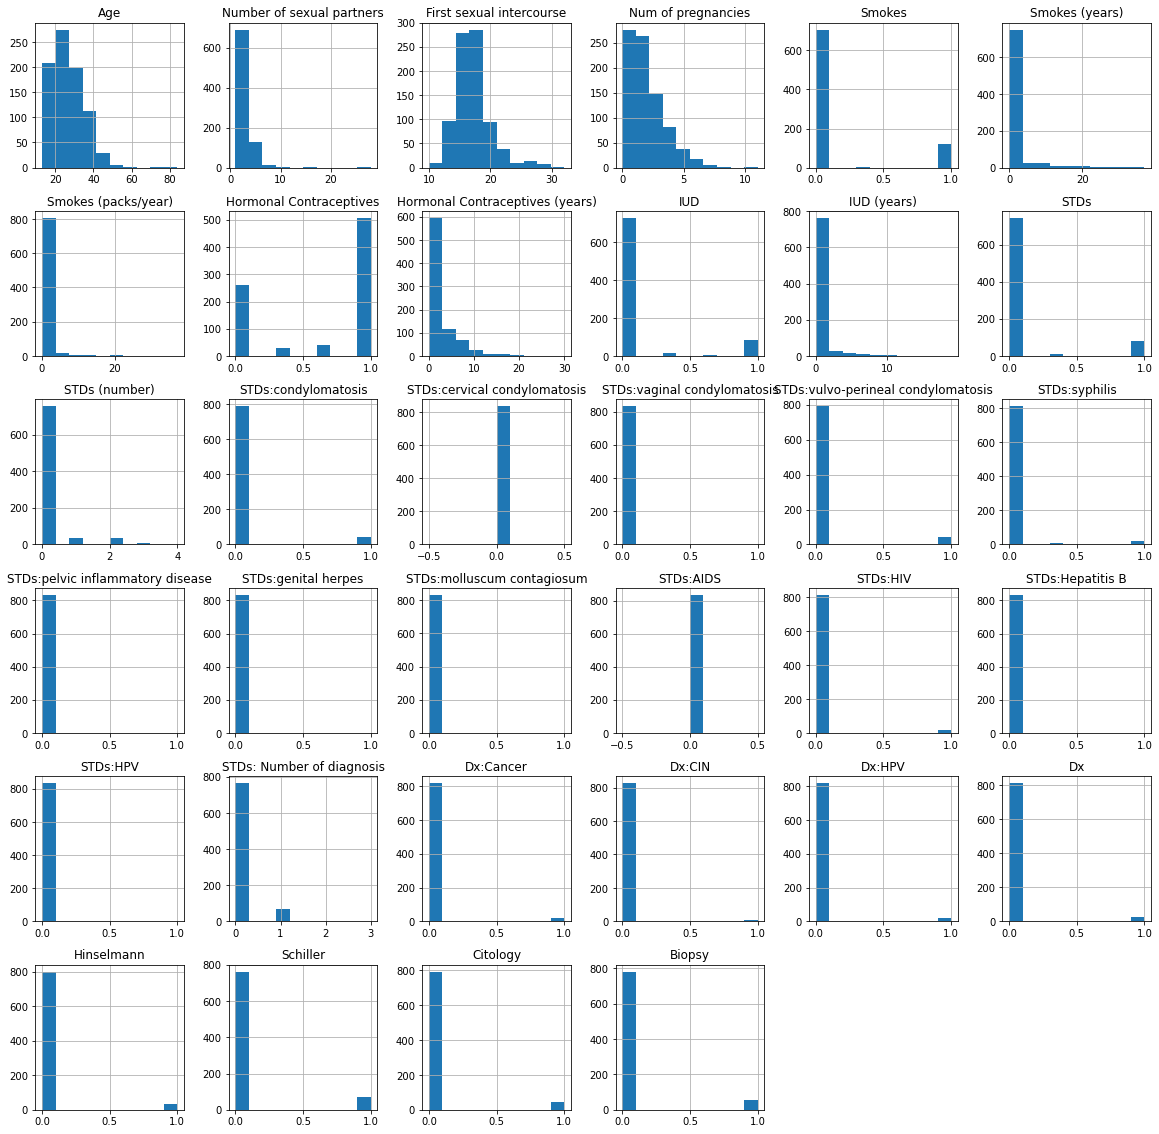

In [26]:
df.hist(figsize=(20,20))
plt.show()

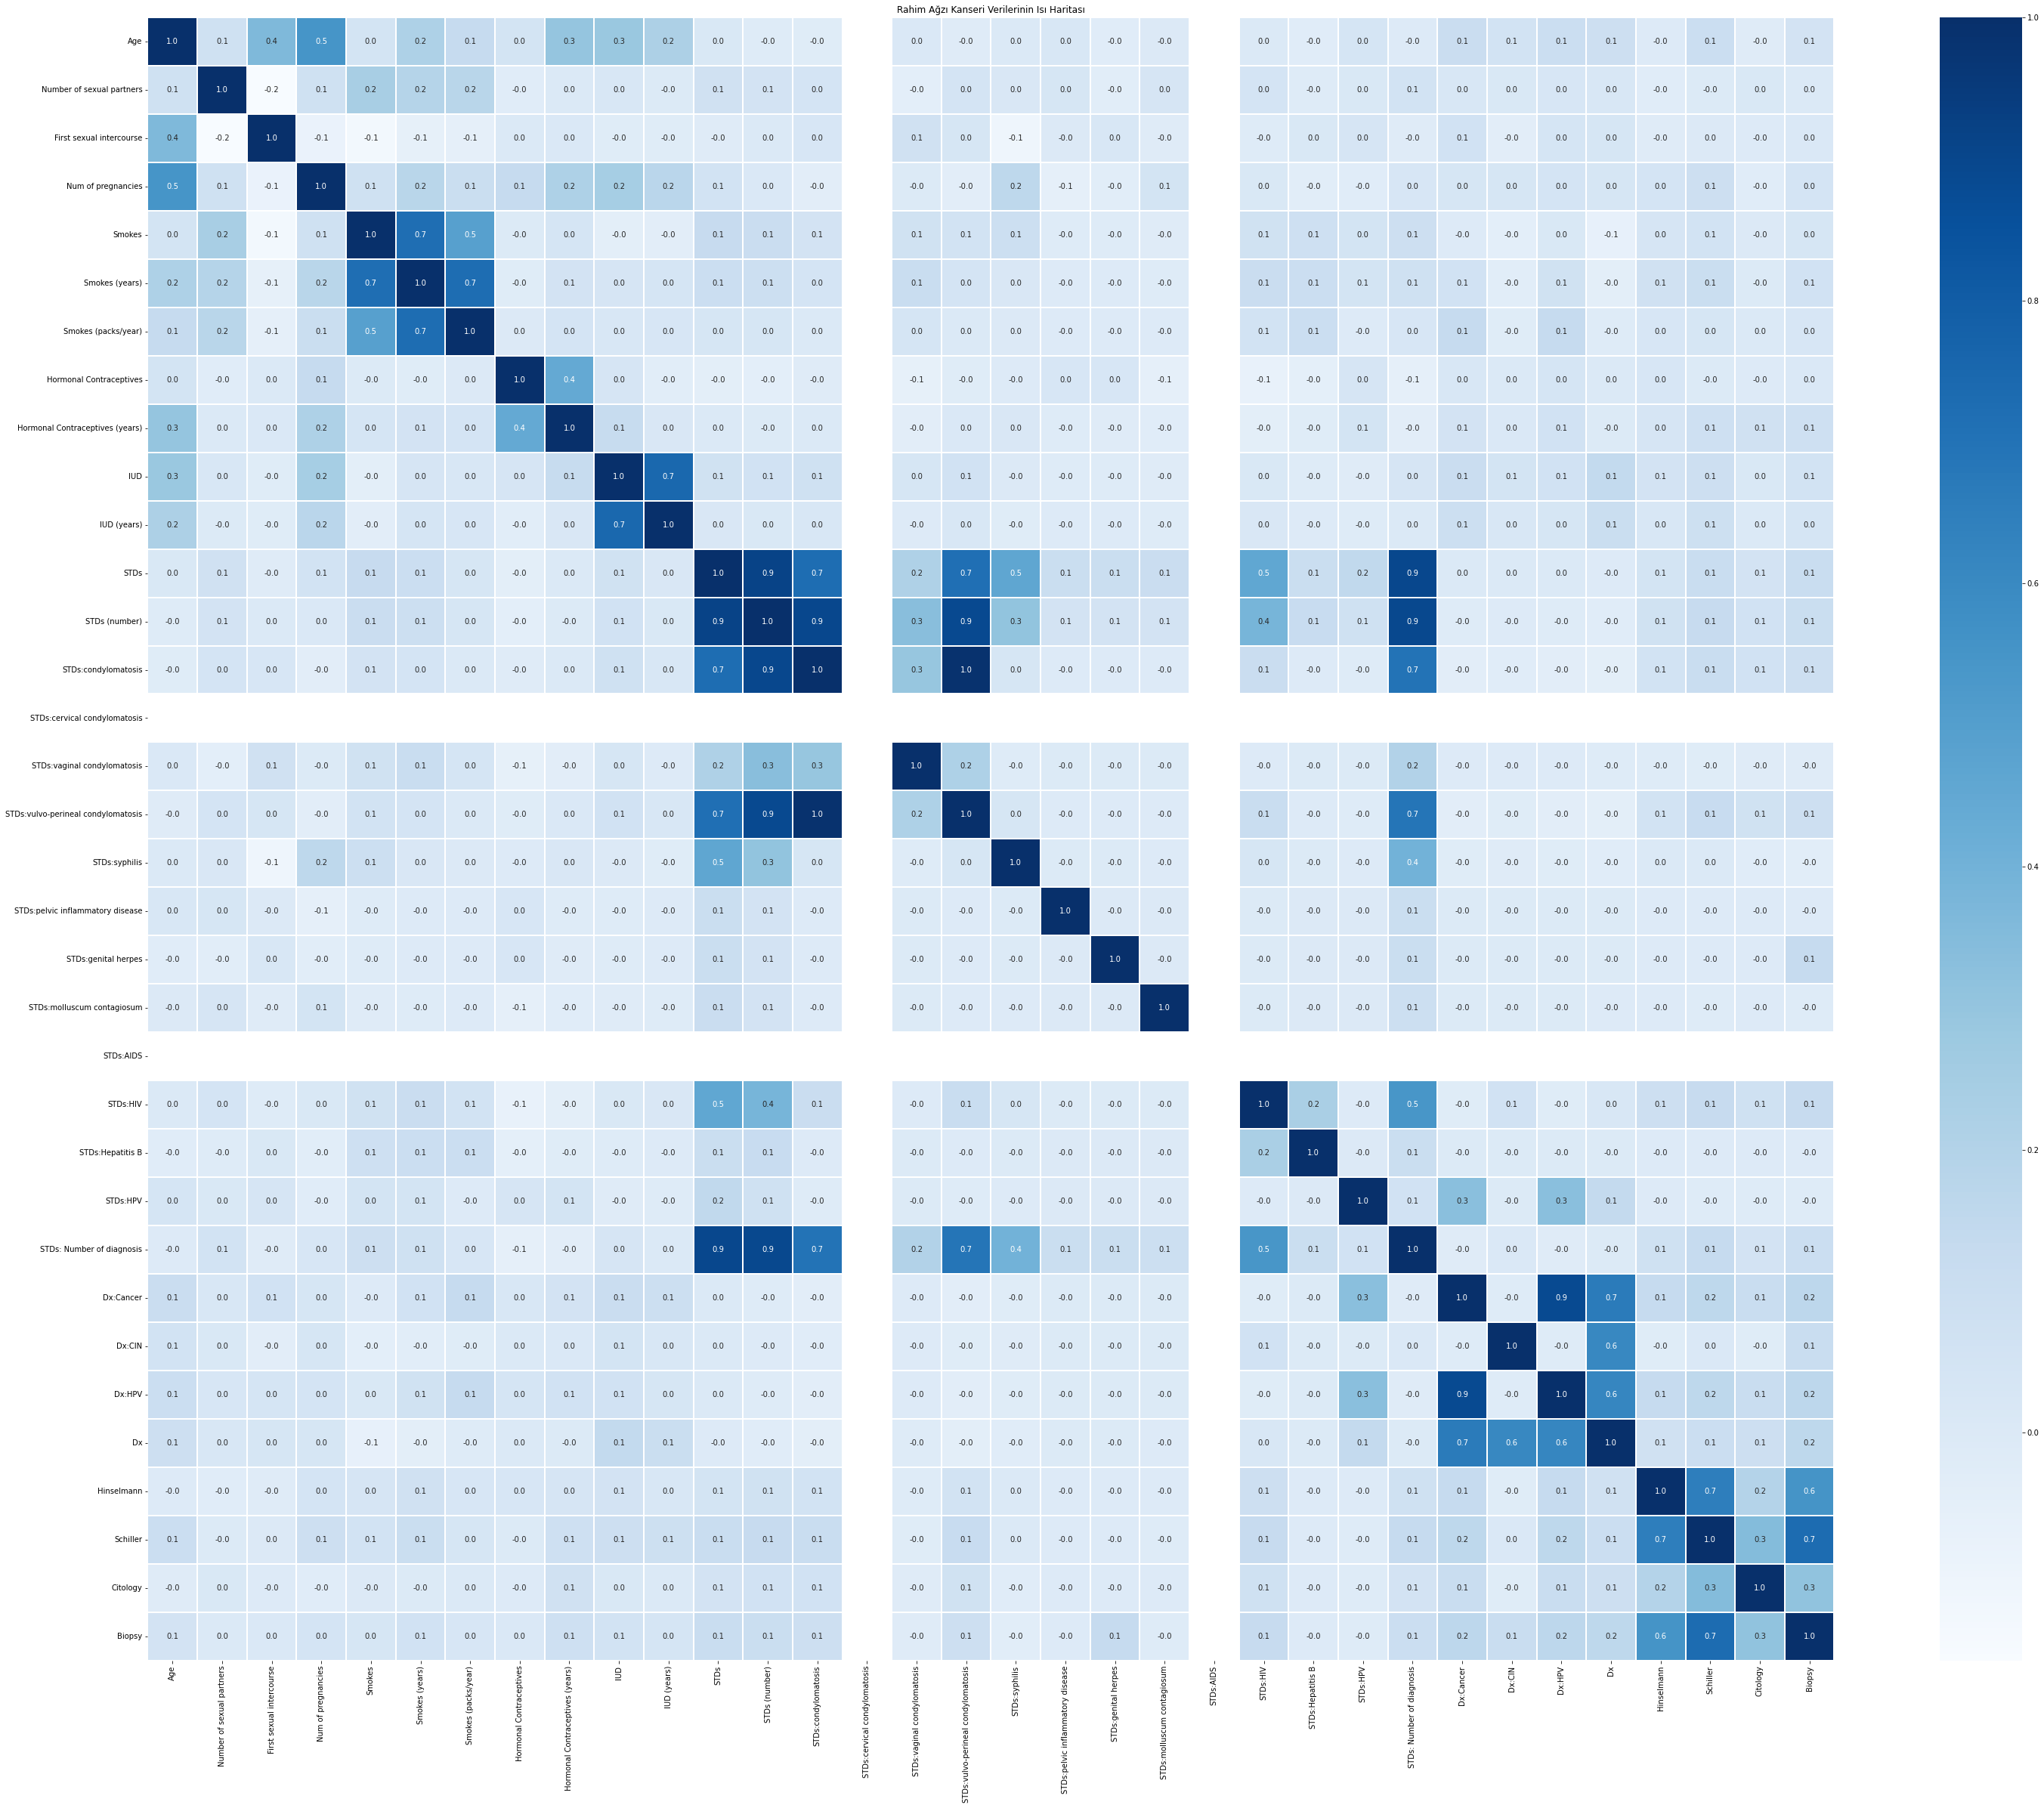

In [27]:
plt.figure(figsize=(50,40))
plt.title("Rahim Ağzı Kanseri Verilerinin Isı Haritası")
sns.heatmap(df.corr(),linewidths=2,annot=True, cbar=2, cmap='Blues',fmt=".1f")
plt.show()

In [28]:
data=pd.DataFrame(df[['Hinselmann','Schiller','Citology','Biopsy']])
data.head(10)

,Hinselmann,Schiller,Citology,Biopsy
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


In [29]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, recall_score, accuracy_score, precision_score ,mean_squared_error,classification_report

In [30]:
from sklearn.feature_selection import RFE

In [31]:
def scores(actual, predicted):
    # # karışıklık matrisi
    # c_matrix = confusion_matrix(actual, predicted)
    # print(c_matrix)
    score = f1_score(actual, predicted)
    recall = recall_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    print('Kesinlik：', precision * 100)
    print('Doğruluk:', accuracy * 100)
    print('Recall: ', recall * 100)
    print("F1: ", score * 100) 

In [32]:
data['count']=data['Hinselmann']+data['Schiller']+data['Citology']+data['Biopsy']

In [33]:
data['result']=np.where(data['count']>0,1,data['count'])

In [34]:
data['result'].value_counts()

0.0    734
1.0    101
Name: result, dtype: int64

In [35]:
#df['count']=df['Hinselmann']+df['Schiller']+df['Citology']+df['Biopsy']

In [36]:
#df['result']=np.where(df['count']>0,1,df['count'])

In [37]:
#df['result'].value_counts()

In [40]:
#yas_filtre = (df["Age"] >= 15)  & (df["Age"] <= 20) & (df["result"] == 1)
#yas_araligi_1 = df[yas_filtre]

#yas_filtre = (df["Age"] >= 21) & (df["Age"] <= 25)  & (df["result"] == 1)
#yas_araligi_2 = df[yas_filtre]

#yas_filtre = (df["Age"] >= 26) & (df["Age"] <= 30) & (df["result"] == 1)
#yas_araligi_3 = df[yas_filtre]

#yas_filtre = (df["Age"] >= 31) & (df["Age"] <= 35) & (df["result"] == 1)
#yas_araligi_4 = df[yas_filtre]

#yas_filtre = (df["Age"] >= 36) & (df["Age"] <= 40) & (df["result"] == 1)
#yas_araligi_5 = df[yas_filtre]

#yas_filtre = (df["Age"] >= 41) & (df["Age"] <= 45) & (df["result"] == 1)
#yas_araligi_6 = df[yas_filtre]

#yas_filtre = (df["Age"] >= 46) & (df["Age"] <= 50) & (df["result"] == 1)
#yas_araligi_7 = df[yas_filtre]

In [42]:
#hasta_sayisi_1 = len(yas_araligi_1)
#hasta_sayisi_2 = len(yas_araligi_2)
#hasta_sayisi_3 = len(yas_araligi_3)
#hasta_sayisi_4 = len(yas_araligi_4)
#hasta_sayisi_5 = len(yas_araligi_5)
#hasta_sayisi_6 = len(yas_araligi_6)
#hasta_sayisi_7 = len(yas_araligi_7)

In [43]:
#print("15-20 yaş aralığında hasta sayısı:", hasta_sayisi_1)
#print("20-25 yaş aralığında hasta sayısı:", hasta_sayisi_2)
#print("25-30 yaş aralığında hasta sayısı:", hasta_sayisi_3)
#print("30-35 yaş aralığında hasta sayısı:", hasta_sayisi_4)
#print("35-40 yaş aralığında hasta sayısı:", hasta_sayisi_5)
#print("40-45 yaş aralığında hasta sayısı:", hasta_sayisi_6)
#print("45-50 yaş aralığında hasta sayısı:", hasta_sayisi_7)

In [44]:
#Aşağıdaki kod bloğunda sadece Biopsy bazında her bir makine öğrenmesi algoritmasının performansları aşağıdaki gibidir.

#df_X=df.drop(columns=['Biopsy'],axis=1)
df_Y=df['Biopsy']

#Random forest için Seçilen Özellik Dışındakilerin Çıkarılması
df_X=df.drop(columns=["Citology","STDs (number)","Dx:HPV","IUD (years)","Smokes","Smokes (years)","Hormonal Contraceptives","IUD","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx:Cancer","Dx:CIN","Dx",'Biopsy'],axis=1)

#XGBoost için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["Dx:HPV","Dx:Cancer","Number of sexual partners","Num of pregnancies","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs (number)","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx",'Biopsy'],axis=1)

#DecisionTree için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["IUD (years)","Number of sexual partners","Smokes (years)","Smokes","Smokes (packs/year)","Hormonal Contraceptives","IUD","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx:Cancer","Dx:CIN","Dx:HPV","Dx",'Biopsy'],axis=1)

#SVC için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["STDs:genital herpes","STDs:vaginal condylomatosis","STDs:HPV","Age","Number of sexual partners","First sexual intercourse","Num of pregnancies","Smokes","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs: Number of diagnosis",'Biopsy'],axis=1)




#Aşağıdaki kod bloğunda 4 adet hedef değişkeninin toplamı şeklinde her bir makine öğrenmesi algoritmasının performansları aşağıdaki gibidir.



#df_X=df.drop(columns=['Hinselmann','Schiller','Citology','Biopsy'],axis=1)
#df_Y=data['result']


#Random forest için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["Dx:HPV","Smokes","Smokes (years)","Hormonal Contraceptives","IUD","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx:Cancer","Dx:CIN","Dx",'Hinselmann','Schiller','Citology','Biopsy'],axis=1)

#XGBoost için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["Dx:CIN","First sexual intercourse","Num of pregnancies","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs (number)","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx",'Hinselmann','Schiller','Citology','Biopsy'],axis=1)

#DecisionTree için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["STDs:syphilis","Hormonal Contraceptives","STDs (number)","Dx:Cancer","Smokes","IUD","STDs","STDs:condylomatosis","STDs:cervical condylomatosis","STDs:vaginal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:pelvic inflammatory disease","STDs:genital herpes","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs:Hepatitis B","STDs:HPV","STDs: Number of diagnosis","Dx:Cancer","Dx:CIN","Dx:HPV","Dx",'Hinselmann','Schiller','Citology','Biopsy'],axis=1)

#SVC için Seçilen Özellik Dışındakilerin Çıkarılması
#df_X=df.drop(columns=["STDs:HPV","STDs:Hepatitis B","Age","Number of sexual partners","First sexual intercourse","Num of pregnancies","Smokes","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives","Hormonal Contraceptives (years)","IUD","IUD (years)","STDs","STDs:cervical condylomatosis","STDs:vulvo-perineal condylomatosis","STDs:syphilis","STDs:pelvic inflammatory disease","STDs:molluscum contagiosum","STDs:AIDS","STDs:HIV","STDs: Number of diagnosis",'Hinselmann','Schiller','Citology','Biopsy'],axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2)

In [46]:
X_train.shape,y_train.shape

((668, 30), (668,))

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RandomForest=RandomForestClassifier(n_estimators=150,random_state=0)

In [49]:
rfe = RFE(estimator=RandomForest, n_features_to_select=10, step=1)
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(n_estimators=150, random_state=0),
    n_features_to_select=10)

In [50]:
for i, col in zip(range(X_train.shape[1]), X_train.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=True rank=1
Number of sexual partners selected=True rank=1
First sexual intercourse selected=True rank=1
Num of pregnancies selected=True rank=1
Smokes selected=False rank=8
Smokes (years) selected=True rank=1
Smokes (packs/year) selected=True rank=1
Hormonal Contraceptives selected=False rank=2
Hormonal Contraceptives (years) selected=True rank=1
IUD selected=False rank=5
IUD (years) selected=True rank=1
STDs selected=False rank=9
STDs (number) selected=True rank=1
STDs:condylomatosis selected=False rank=13
STDs:cervical condylomatosis selected=False rank=21
STDs:vaginal condylomatosis selected=False rank=15
STDs:vulvo-perineal condylomatosis selected=False rank=10
STDs:syphilis selected=False rank=12
STDs:pelvic inflammatory disease selected=False rank=18
STDs:genital herpes selected=False rank=19
STDs:molluscum contagiosum selected=False rank=17
STDs:AIDS selected=False rank=20
STDs:HIV selected=False rank=3
STDs:Hepatitis B selected=False rank=16
STDs:HPV selected=Fals

In [51]:
predictions = rfe.predict(X_test)

In [52]:
scores(y_test,predictions)

Kesinlik： 0.0
Doğruluk: 87.42514970059881
Recall:  0.0
F1:  0.0


In [53]:
selected_features = DataFrame({'Feature':list(X_train.columns),'Ranking':rfe.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
0,Age,1
1,Number of sexual partners,1
2,First sexual intercourse,1
3,Num of pregnancies,1
5,Smokes (years),1
6,Smokes (packs/year),1
8,Hormonal Contraceptives (years),1
10,IUD (years),1
12,STDs (number),1
28,Dx:HPV,1


In [54]:
rf=RandomForestClassifier(n_estimators=150,random_state=0)

In [55]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [56]:
y_pred2=rf.predict(X_test)
scores(y_test, y_pred2)

Kesinlik： 0.0
Doğruluk: 88.02395209580838
Recall:  0.0
F1:  0.0


In [57]:
import matplotlib.pyplot as plt

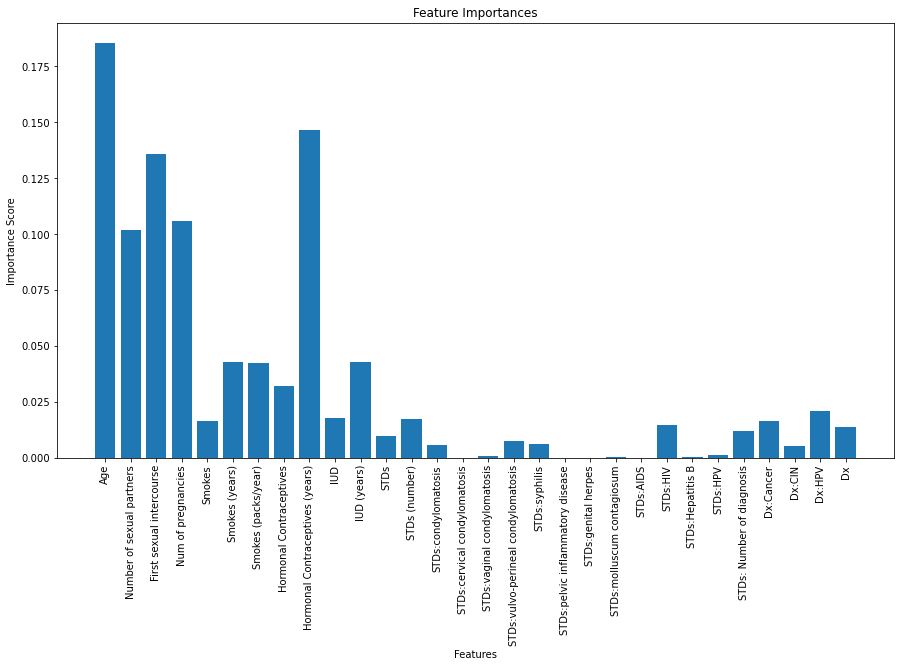

In [58]:
feature_importances = rf.feature_importances_
plt.figure(figsize=(15, 8))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [59]:
from sklearn import metrics

In [60]:
metrics.confusion_matrix(y_test, y_pred2)

array([[147,   5],
       [ 15,   0]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
display(X_train.shape)
X_test.shape

(668, 30)

(167, 30)

In [63]:
y_train.value_counts()

0.0    582
1.0     86
Name: result, dtype: int64

In [64]:
y_test.value_counts()

0.0    152
1.0     15
Name: result, dtype: int64

In [65]:
rfe = RFE(estimator=XGBClassifier(), n_features_to_select=10, step=1)
rfe.fit(X_train,y_train)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=None, num_parallel_tree=None, predictor=None,
                            random_state=None, ...),
    n_fea

In [66]:
for i, col in zip(range(X_train.shape[1]), X_train.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=False rank=5
Number of sexual partners selected=False rank=4
First sexual intercourse selected=False rank=8
Num of pregnancies selected=False rank=2
Smokes selected=False rank=3
Smokes (years) selected=True rank=1
Smokes (packs/year) selected=True rank=1
Hormonal Contraceptives selected=True rank=1
Hormonal Contraceptives (years) selected=True rank=1
IUD selected=True rank=1
IUD (years) selected=True rank=1
STDs selected=False rank=10
STDs (number) selected=False rank=9
STDs:condylomatosis selected=False rank=6
STDs:cervical condylomatosis selected=False rank=21
STDs:vaginal condylomatosis selected=False rank=20
STDs:vulvo-perineal condylomatosis selected=True rank=1
STDs:syphilis selected=False rank=12
STDs:pelvic inflammatory disease selected=False rank=13
STDs:genital herpes selected=False rank=14
STDs:molluscum contagiosum selected=False rank=15
STDs:AIDS selected=False rank=16
STDs:HIV selected=True rank=1
STDs:Hepatitis B selected=False rank=19
STDs:HPV selected=Fals

In [67]:
xgb_cls = xgb.XGBClassifier()

In [68]:
xgb_cls.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
preds = xgb_cls.predict(X_test)

In [70]:
#XGBoost
scores(y_test, preds)

Kesinlik： 7.142857142857142
Doğruluk: 83.8323353293413
Recall:  6.666666666666667
F1:  6.89655172413793


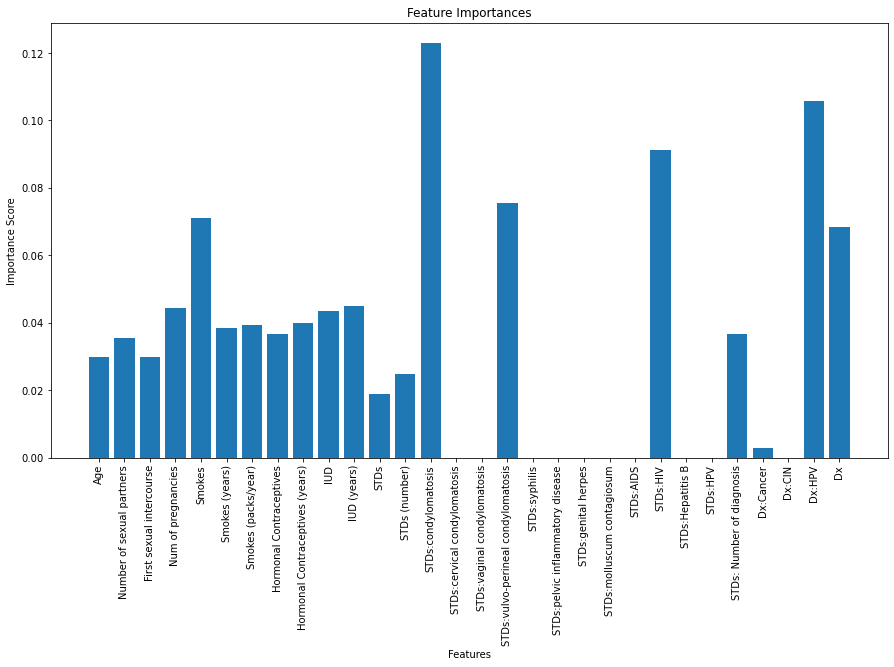

In [71]:
feature_importances = xgb_cls.feature_importances_
plt.figure(figsize=(15, 8))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [72]:
from sklearn.tree import DecisionTreeClassifier


In [73]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [74]:
for i, col in zip(range(X_train.shape[1]), X_train.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=True rank=1
Number of sexual partners selected=True rank=1
First sexual intercourse selected=True rank=1
Num of pregnancies selected=True rank=1
Smokes selected=False rank=7
Smokes (years) selected=True rank=1
Smokes (packs/year) selected=True rank=1
Hormonal Contraceptives selected=False rank=3
Hormonal Contraceptives (years) selected=True rank=1
IUD selected=False rank=5
IUD (years) selected=True rank=1
STDs selected=False rank=15
STDs (number) selected=True rank=1
STDs:condylomatosis selected=False rank=19
STDs:cervical condylomatosis selected=False rank=21
STDs:vaginal condylomatosis selected=False rank=20
STDs:vulvo-perineal condylomatosis selected=False rank=4
STDs:syphilis selected=False rank=8
STDs:pelvic inflammatory disease selected=False rank=6
STDs:genital herpes selected=False rank=10
STDs:molluscum contagiosum selected=False rank=11
STDs:AIDS selected=False rank=12
STDs:HIV selected=False rank=2
STDs:Hepatitis B selected=False rank=9
STDs:HPV selected=False r

In [75]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
preds2 = tree.predict(X_test)

In [77]:
scores(y_test, preds2)

Kesinlik： 4.3478260869565215
Doğruluk: 78.44311377245509
Recall:  6.666666666666667
F1:  5.2631578947368425


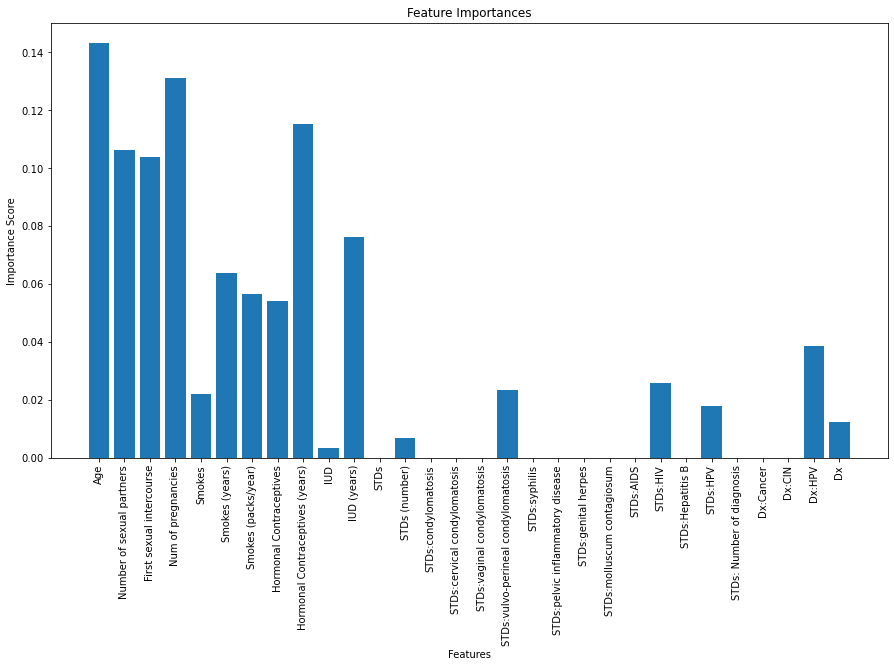

In [78]:
feature_importances = tree.feature_importances_
plt.figure(figsize=(15, 8))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [79]:
from sklearn.svm import SVC

In [80]:
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10, step=1)
rfe.fit(X_train,y_train)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)

In [81]:
for i, col in zip(range(X_train.shape[1]), X_train.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=False rank=13
Number of sexual partners selected=False rank=7
First sexual intercourse selected=False rank=12
Num of pregnancies selected=False rank=9
Smokes selected=False rank=6
Smokes (years) selected=False rank=5
Smokes (packs/year) selected=False rank=4
Hormonal Contraceptives selected=False rank=11
Hormonal Contraceptives (years) selected=False rank=14
IUD selected=False rank=10
IUD (years) selected=False rank=8
STDs selected=True rank=1
STDs (number) selected=True rank=1
STDs:condylomatosis selected=True rank=1
STDs:cervical condylomatosis selected=False rank=21
STDs:vaginal condylomatosis selected=False rank=20
STDs:vulvo-perineal condylomatosis selected=True rank=1
STDs:syphilis selected=True rank=1
STDs:pelvic inflammatory disease selected=False rank=15
STDs:genital herpes selected=False rank=16
STDs:molluscum contagiosum selected=False rank=17
STDs:AIDS selected=False rank=18
STDs:HIV selected=True rank=1
STDs:Hepatitis B selected=False rank=19
STDs:HPV selected

In [82]:
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [83]:
y_pred = classifier.predict(X_test)

In [84]:
scores(y_test, y_pred)

Kesinlik： 25.0
Doğruluk: 89.82035928143712
Recall:  6.666666666666667
F1:  10.526315789473685


In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knc_cls = KNeighborsClassifier(n_neighbors=5, algorithm ='auto')

In [87]:
knc_cls.fit(X_train,y_train)

KNeighborsClassifier()

In [88]:
y_pred = knc_cls.predict(X_test)

In [89]:
scores(y_test, y_pred)

Kesinlik： 0.0
Doğruluk: 89.22155688622755
Recall:  0.0
F1:  0.0
